In [22]:
def df_to_geojson(df, properties, lat='latitude', lon='longitude'):
    """
    Turn a dataframe containing point data into a geojson formatted python dictionary
    
    df : the dataframe to convert to geojson
    properties : a list of columns in the dataframe to turn into geojson feature properties
    lat : the name of the column in the dataframe that contains latitude data
    lon : the name of the column in the dataframe that contains longitude data
    """
    
    # create a new python dict to contain our geojson data, using geojson format
    geojson = {'type':'FeatureCollection', 'features':[]}

    # loop through each row in the dataframe and convert each row to geojson format
    for _, row in df.iterrows():
        # create a feature template to fill in
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}

        # fill in the coordinates
        feature['geometry']['coordinates'] = [row[lon],row[lat]]

        # for each column, get the value and add it as a new feature property
        for prop in properties:
            feature['properties'][prop] = row[prop]
        
        # add this feature (aka, converted dataframe row) to the list of features inside our dict
        geojson['features'].append(feature)
    
    return geojson

In [23]:
#Step 1.Convert xarray to pandas dataframe

In [24]:
import xarray as xr

In [25]:
sample_day = xr.open_dataset("/Volumes/portableHardDisk/data/glofas/2019/CEMS_ECMWF_dis24_20190105_glofas_v2.1.nc")

In [26]:
sample_threshold = xr.open_dataset('/Volumes/portableHardDisk/data/thresholds/2year.nc')

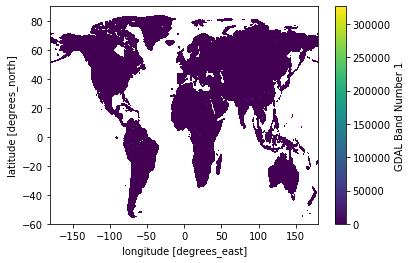

In [29]:
sample_threshold['Band1'].isel

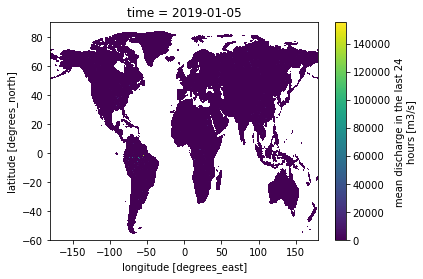

In [27]:
sample_day['dis24'].plot()

In [9]:
mask = sample_day['dis24'] > sample_threshold['Band1']

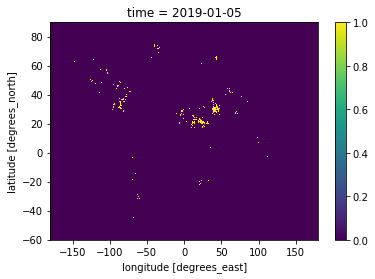

In [10]:
mask.plot()

In [11]:
sample_day = sample_day.where(mask, drop=True)

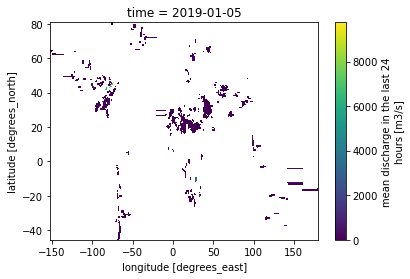

In [12]:
sample_day['dis24'].plot()

In [122]:
df = sample_day["dis24"].to_dataframe()

In [123]:
df = df[df['dis24'].notna()]

In [124]:
df.reset_index(inplace=True)  

In [125]:
df.columns

Index(['time', 'lat', 'lon', 'dis24'], dtype='object')

In [126]:
geojson_dict = df_to_geojson(df, properties=['dis24', "lat", "lon"], lat='lat', lon="lon");

In [127]:
geojson_dict

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'dis24': 16.643328648695462,
    'lat': 36.849998474121094,
    'lon': 38.54999923706055},
   'geometry': {'type': 'Point',
    'coordinates': [38.54999923706055, 36.849998474121094]}},
  {'type': 'Feature',
   'properties': {'dis24': 18.11016151604086,
    'lat': 36.75,
    'lon': 38.650001525878906},
   'geometry': {'type': 'Point', 'coordinates': [38.650001525878906, 36.75]}},
  {'type': 'Feature',
   'properties': {'dis24': 20.625994174857087,
    'lat': 36.650001525878906,
    'lon': 38.75},
   'geometry': {'type': 'Point', 'coordinates': [38.75, 36.650001525878906]}},
  {'type': 'Feature',
   'properties': {'dis24': 21.18205169024703,
    'lat': 36.650001525878906,
    'lon': 38.849998474121094},
   'geometry': {'type': 'Point',
    'coordinates': [38.849998474121094, 36.650001525878906]}},
  {'type': 'Feature',
   'properties': {'dis24': 21.627966373496584,
    'lat': 36.54999923706055,
    'lon': 

In [128]:
import json
geojson_str = json.dumps(geojson_dict, indent=2)

In [129]:
time = df['time'][0].strftime("%m-%d-%Y")

In [63]:
time

'01-05-2019'

In [65]:
 # save the geojson result to a file
output_filename = '/Volumes/portableHardDisk/data/geojsonp/'+ time + '.geojsonp'
with open(output_filename, 'w') as output_file:
    output_file.write('eqfeed_callback({})'.format(geojson_str))
    

In [73]:
i = str(301)
i.zfill(2)



'301'

In [21]:
#Do this for a month at a global scale 
import json
sample_threshold = xr.open_dataset('/Volumes/portableHardDisk/data/thresholds/2year.nc')
for i in range(1,32):
    i = str(i).zfill(2)
    sample_day = xr.open_dataset("/Volumes/portableHardDisk/data/glofas/2013/CEMS_ECMWF_dis24_201306"+ i +"_glofas_v2.1.nc")
    sample_day = sample_day.where((sample_day['dis24'] > sample_threshold['Band1']), drop=True)
    df = sample_day["dis24"].to_dataframe()
    df = df[df['dis24'].notna()]
    df.reset_index(inplace=True)  
    geojson_dict = df_to_geojson(df, properties=['dis24', "lat", "lon"], lat='lat', lon="lon")
    geojson_str = json.dumps(geojson_dict, indent=2)
    time = df['time'][0].strftime("%m-%d-%Y")
    output_filename = '/Volumes/portableHardDisk/data/geojsonp/2year/'+ time + '.geojsonp'
    with open(output_filename, 'w') as output_file:
        output_file.write('eqfeed_callback({})'.format(geojson_str))

FileNotFoundError: [Errno 2] No such file or directory: b'/Volumes/portableHardDisk/data/glofas/2013/CEMS_ECMWF_dis24_20130631_glofas_v2.1.nc'

In [79]:
df

,time,lat,lon,dis24
0,2019-01-02,69.75,84.75,10120.081055
1,2019-01-02,69.75,84.85,10114.541016
2,2019-01-02,69.75,84.95,10110.479492
3,2019-01-02,69.75,85.05,10106.587891
4,2019-01-02,69.75,85.15,10102.459961
...,...,...,...,...
2843,2019-01-02,-33.85,-58.95,10554.273438
2844,2019-01-02,-33.95,-58.85,10573.445312
2845,2019-01-02,-33.95,-58.75,10586.578125
2846,2019-01-02,-33.95,-58.65,10593.579102
